# Point spread function

The point spread function is a function that return the event density $dP/d\Omega$ as a function of distance to the source $\psi$. This function is provided for different energy ranges, to account for the energy dependence of the direction reconstruction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from arca230.psf import PointSpreadFunction

Here we load the point spread function for the track and shower channel.

In [2]:
psf_instance_track = PointSpreadFunction(file_path=f"../data/psf_numuCC_track.csv") 
psf_instance_shower = PointSpreadFunction(file_path=f"../data/psf_nueCC_shower.csv")

Point Spread Function data loaded successfully.
Point Spread Function data loaded successfully.


Now we obtain the distributions for $dP/d\Omega$ for different slices of log energy.

In [3]:
psf_track_E1 = psf_instance_track.psf_response(logE=3.5)
psf_track_E2 = psf_instance_track.psf_response(logE=5)
psf_track_E3 = psf_instance_track.psf_response(logE=6)

psf_shower_E1 = psf_instance_shower.psf_response(logE=3.5)
psf_shower_E2 = psf_instance_shower.psf_response(logE=5)
psf_shower_E3 = psf_instance_shower.psf_response(logE=6)

Let's plot!

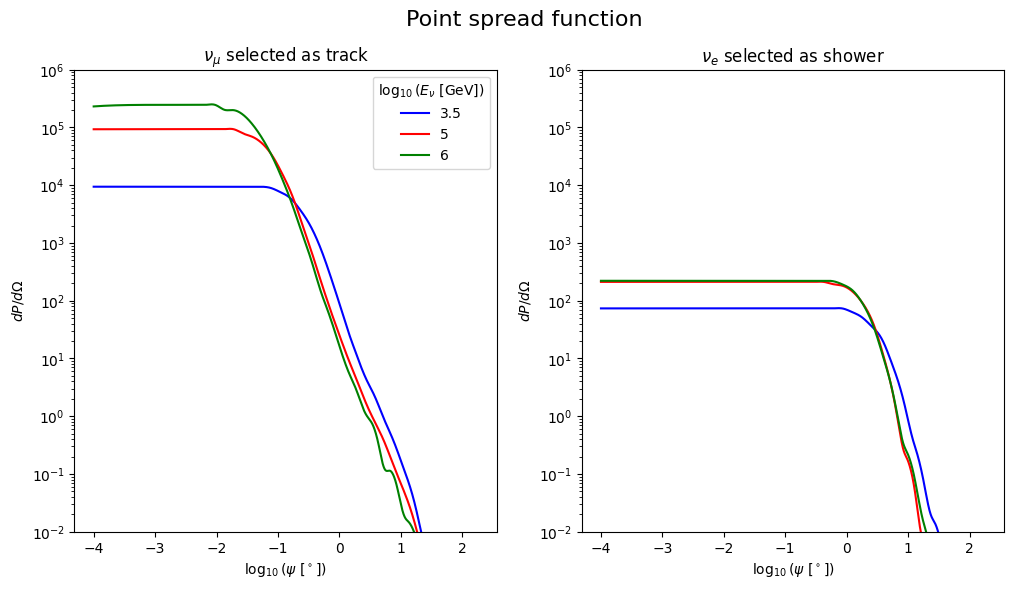

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.suptitle(f"Point spread function", fontsize=16)

# tracks
axes[0].set_title(r"$\nu_\mu$ selected as track")
axes[0].set_yscale("log")
axes[0].set_ylim([1e-2, 1e6])
axes[0].set_xlabel(r"$\log_{10}(\psi$ [$^\circ$])")
axes[0].set_ylabel(r"$dP/d\Omega$")
axes[0].plot(psf_track_E1["log10(psi [degrees])"], psf_track_E1["dP/dOmega"], color="blue", label="3.5")
axes[0].plot(psf_track_E2["log10(psi [degrees])"], psf_track_E2["dP/dOmega"], color="red", label="5")
axes[0].plot(psf_track_E3["log10(psi [degrees])"], psf_track_E3["dP/dOmega"], color="green", label="6")
axes[0].legend(title=r"$\log_{10}(E_\nu$ [GeV])")

# showers
axes[1].set_title(r"$\nu_e$ selected as shower")
axes[1].set_yscale("log")
axes[1].set_ylim([1e-2, 1e6])
axes[1].set_xlabel(r"$\log_{10}(\psi$ [$^\circ$])")
axes[1].set_ylabel(r"$dP/d\Omega$")
axes[1].plot(psf_shower_E1["log10(psi [degrees])"], psf_shower_E1["dP/dOmega"], color="blue", label="3.5")
axes[1].plot(psf_shower_E2["log10(psi [degrees])"], psf_shower_E2["dP/dOmega"], color="red", label="5")
axes[1].plot(psf_shower_E3["log10(psi [degrees])"], psf_shower_E3["dP/dOmega"], color="green", label="6")

The point spread function can be used to calculate the number of events within a given search cone.

In [5]:
log_nuE = 5  # E in [GeV]

log_conesizes = np.linspace(-3, 2, 50)  # [degrees]
fractions_track = np.zeros(len(log_conesizes))
fractions_shower = np.zeros(len(log_conesizes))

for i in range(len(log_conesizes)):
    conesize = 10 ** log_conesizes[i]
    fractions_track[i] = psf_instance_track.fraction_below_angle(logE=log_nuE, angle_max=conesize)
    fractions_shower[i] = psf_instance_shower.fraction_below_angle(logE=log_nuE, angle_max=conesize)

Let's plot!

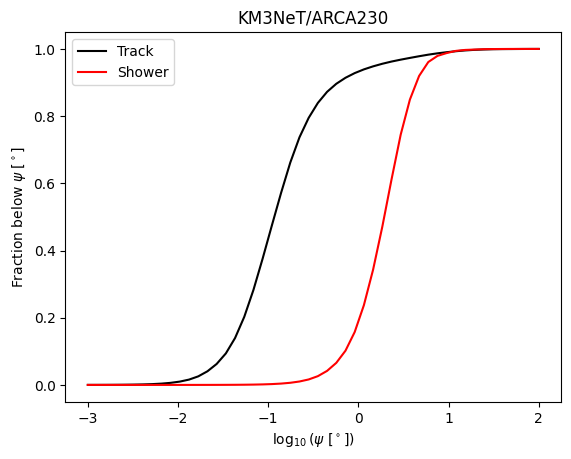

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_title("KM3NeT/ARCA230")

ax.plot(log_conesizes, fractions_track, label="Track", color="black")
ax.plot(log_conesizes, fractions_shower, label="Shower", color="red")

ax.set_xlabel(r"$\log_{10}(\psi$ [$^\circ$])")
ax.set_ylabel(r"Fraction below $\psi$ [$^\circ$]")

ax.legend(loc="best")

plt.show()

The fraction_below function can be used to reproduce the angular resolution of the KM3NeT/ARCA230 detector.

In [7]:
def find_quantile_resolution(psf_instance, log_nuE, quantile=0.5, tolerance=1e-3, max_iterations=100):
    angle_min = 1e-5  # [degrees]
    angle_max = 180   # [degrees]

    i = 0
    while i < max_iterations:
        angle_tmp = (angle_max + angle_min) / 2
        fraction = psf_instance.fraction_below_angle(logE=log_nuE, angle_max=angle_tmp)

        if abs(fraction - quantile) < tolerance:
            return angle_tmp

        if fraction > quantile:
            angle_max = angle_tmp
        elif fraction < quantile:
            angle_min = angle_tmp

        i += 1

    # If max_iterations is reached without meeting tolerance, return the last result
    return angle_tmp


logE_array = np.linspace(3.5,7.5,10)
median_track = [ find_quantile_resolution(psf_instance_track,logE,0.5) for logE in logE_array ]
median_shower = [ find_quantile_resolution(psf_instance_shower,logE,0.5) for logE in logE_array ]

Lets plot!

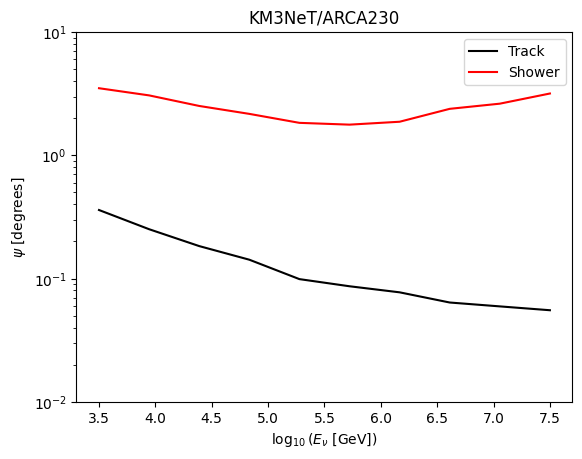

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_title("KM3NeT/ARCA230")

ax.set_yscale("log")
ax.set_ylim([1e-2,1e1])

ax.plot(logE_array, median_track, label="Track", color="black")
ax.plot(logE_array, median_shower, label="Shower", color="red")

ax.set_xlabel(r"$\log_{10}(E_\nu$ [GeV])")
ax.set_ylabel(r"$\psi$ [degrees]")

ax.legend(loc="best")

plt.show()